###### In this notebook I attempt to fit my data using a neural network with the keras library. I import my cleaned data, perform a train-test split, make a simple neural network and build my model. Then I compare the predictions of my model with the actual results of my model to see if I can find issues in the predictions.

In [523]:
import pandas as pd
import numpy as np
import nltk
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()


file_path_comments = r'~/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'

#file_path_comments = r'/mnt/c/Users/msteele9/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'
clean_comments = pd.read_csv(file_path_comments, index_col = False)

In [524]:
from sklearn.model_selection import train_test_split
import random
from datetime import datetime

X = clean_comments['commentBody']
y = clean_comments['recommendations']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random.seed(datetime.now()))

In [525]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=False, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=1, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(X_train)

In [526]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='tanh', input_dim=len(vectorizer.get_feature_names())))

model.add(Dense(units=400, activation='relu'))

model.add(Dense(units=1, activation='relu'))
 
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 500)               2500500   
_________________________________________________________________
dense_163 (Dense)            (None, 400)               200400    
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 401       
Total params: 2,701,301
Trainable params: 2,701,301
Non-trainable params: 0
_________________________________________________________________


In [527]:
model.fit(X_train_onehot, y_train, 
          epochs=10, batch_size=1000, verbose=1, 
          validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 3s 80us/step - loss: 16.3029 - acc: 0.1520 - val_loss: 16.5413 - val_acc: 0.1335
Epoch 2/10
32000/32000 [==============================] - 1s 39us/step - loss: 15.8687 - acc: 0.1467 - val_loss: 16.5299 - val_acc: 0.1315
Epoch 3/10
32000/32000 [==============================] - 1s 39us/step - loss: 15.6652 - acc: 0.1659 - val_loss: 16.6068 - val_acc: 0.1367
Epoch 4/10
32000/32000 [==============================] - 1s 40us/step - loss: 15.5054 - acc: 0.1789 - val_loss: 16.6603 - val_acc: 0.1439
Epoch 5/10
32000/32000 [==============================] - 1s 40us/step - loss: 15.3297 - acc: 0.1886 - val_loss: 16.7730 - val_acc: 0.1469
Epoch 6/10
32000/32000 [==============================] - 1s 43us/step - loss: 15.1274 - acc: 0.2023 - val_loss: 16.8848 - val_acc: 0.1401
Epoch 7/10
32000/32000 [==============================] - 1s 40us/step - loss: 14.9081 - acc: 0.2172 - val_loss: 16.9

In [528]:
X_test_onehot = vectorizer.fit_transform(X_test)

In [529]:
scores = model.evaluate(X_test_onehot, y_test, verbose=1)
print("Accuracy:", model.metrics_names, scores[0], scores[1])

10000/10000 [==============================] - 1s 83us/step
Accuracy: ['loss', 'acc'] 18.89034759063721 0.1273


###### Now let's examine the predictions of my model. First I example five sample data points, and then I plot all of my data vs. their predicted values.

In [517]:
X_train[:5]

13885    I'm sorry for you, sir. The truth is that YOU ...
624      "They are, without a doubt, the dumbest people...
8640     Wasn't Max's unrequited love for Fara, who was...
3451     That sound you hear is my mind fracturing as I...
38457    Hate never works.  People voted for Trump beca...
Name: commentBody, dtype: object

In [518]:
prediction = model.predict(X_test_onehot)
print((prediction[:5]))

[[22.965578 ]
 [ 3.2727158]
 [ 0.8563916]
 [ 7.136145 ]
 [13.958315 ]]


In [519]:
print(y_test.head(5))

23135     2.0
49775    12.0
5660      3.0
33401    10.0
5284      1.0
Name: recommendations, dtype: float64


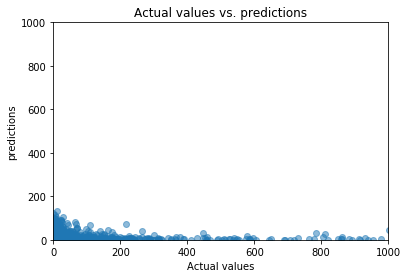

In [520]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(y_test, prediction, alpha=0.5)
plt.title('Actual values vs. predictions')
plt.xlabel('Actual values')
plt.ylabel('predictions')

axes = plt.gca()
axes.set_xlim([0,1000])
axes.set_ylim([0,1000])
#axes.set_xscale('log')

plt.show()

In [521]:
print(y_test.median())
print(y_test.mean())
print(prediction.mean())

3.0
16.0253
6.2979765


Text(0.5, 1.0, 'Predictions')

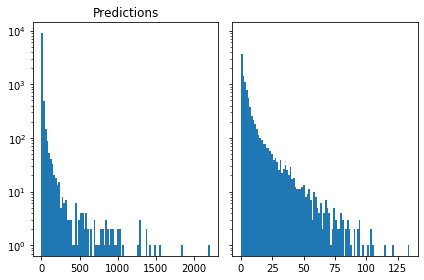

In [522]:
n_bins = 100

# Generate a normal distribution, center at x=0 and y=5
x = y_test
y = prediction

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[0].set_yscale('log')
axs[0].set_title('Actual values')
axs[1].hist(y, bins=n_bins)
axs[1].set_yscale('log')
axs[0].set_title('Predictions')

It seems that our predictions fall within a range of 0 - 200, while the actual data runs from 0 - 1000 with a long tail. 